# Case study on Supervised learning

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to the python environment.

In [345]:
data=pd.read_excel(r"C:\Users\USER\Downloads\iris.xls")

In [346]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [347]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. Do necessary pre-processing steps.

###### Handling Missing values

In [349]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [350]:
for i in ['SL','SW','PL']:
    data[i] = data[i].fillna(data[i].mean())

In [351]:
print("Missing values filled")
data.isna().sum()

Missing values filled


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

###### Handling Outliers

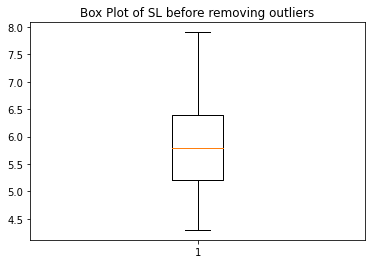

In [352]:
plt.boxplot(data['SL'])
plt.title('Box Plot of SL before removing outliers')
plt.show()

No outliers in SL

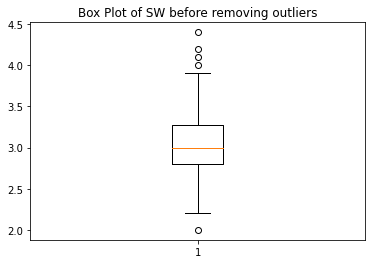

In [353]:
plt.boxplot(data['SW'])
plt.title('Box Plot of SW before removing outliers')
plt.show()

In [354]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
print(' Q1 =',Q1,'\n','Q2 =',Q2,'\n','Q3 =',Q3)

 Q1 = 2.8 
 Q2 = 3.0 
 Q3 = 3.25


In [355]:
IQR = Q3 - Q1
llim = Q1-1.5*IQR
ulim = Q3+1.5*IQR
print(' IQR =',IQR,'\n','Lower Limit =',llim,'\n','Upper  Limit =',ulim)

 IQR = 0.4500000000000002 
 Lower Limit = 2.1249999999999996 
 Upper  Limit = 3.9250000000000003


In [356]:
outlier = []
for x in data['SW']:
    if((x>ulim) or (x<llim)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [357]:
ind1=data.loc[data['SW']<llim].index

ind2=data.loc[data['SW']>ulim].index

In [358]:
print(ind1)
print(ind2)

Int64Index([60], dtype='int64')
Int64Index([14, 15, 32, 33], dtype='int64')


In [359]:
data.drop([14, 15, 32, 33,60],inplace = True)

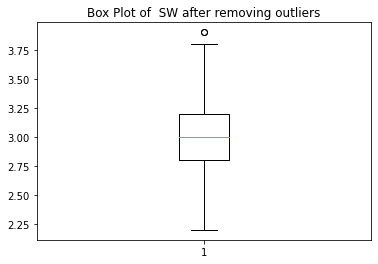

In [360]:
plt.boxplot(data['SW'])
plt.title('Box Plot of  SW after removing outliers')
plt.show()

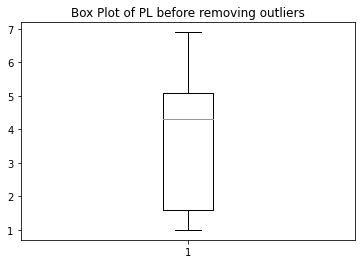

In [361]:
plt.boxplot(data['PL'])
plt.title('Box Plot of PL before removing outliers')
plt.show()

No Outliers in PL

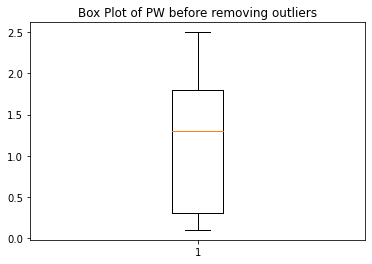

In [362]:
plt.boxplot(data['PW'])
plt.title('Box Plot of PW before removing outliers')
plt.show()

No outliers in PW

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm).

In [363]:
# encoding target column Classification
data['Classification']=data['Classification'].map({'Iris-setosa':2,'Iris-versicolor':1,'Iris-virginica':0}) #target value encoding

In [364]:
y=data['Classification']
X=data.drop(['Classification'],axis=1)

In [365]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Classification, dtype: int64

In [366]:
X.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.855944,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


#### Logical Regression

In [367]:
#splitting the data set for training and testing
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,random_state=42,test_size=0.2)

In [368]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [369]:
#Creating model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=150)

In [370]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [371]:
#Checking the accuracy,precision,recall,f1score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [372]:
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("Precision is : ",precision_score(y_test,y_pred,average='weighted'))
print("Recall is : ",recall_score(y_test,y_pred,average='weighted'))
print('f1_score is : ',f1_score(y_test,y_pred,average='weighted'))

Accuracy is :  0.9310344827586207
Precision is :  0.9310344827586207
Recall is :  0.9310344827586207
f1_score is :  0.9310344827586207


###### KNN

In [373]:
from sklearn.neighbors import KNeighborsClassifier as knc
acc_values=[]
neighbors=np.arange(3,15)
for neighbor in neighbors:
    classifier=knc(n_neighbors=neighbor,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

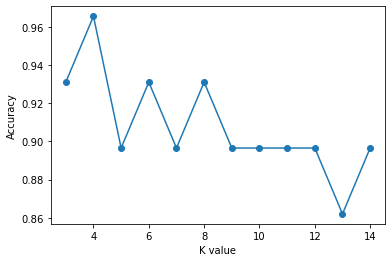

In [374]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")

In [375]:
classifier=knc(n_neighbors=4,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [376]:
print("Accuracy is : ",accuracy_score(y_test,y_pred))
print("Precision is : ",precision_score(y_test,y_pred,average='weighted'))
print("Recall is : ",recall_score(y_test,y_pred,average='weighted'))
print('f1_score is : ',f1_score(y_test,y_pred,average='weighted'))

Accuracy is :  0.9655172413793104
Precision is :  0.9683908045977011
Recall is :  0.9655172413793104
f1_score is :  0.9652526677837552


###### SVM

In [377]:
#linear svm
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_pred))

Accuracy  0.9310344827586207


In [378]:
#polynomial svm
svm_linear=SVC(kernel='poly',degree=3)
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print("Accuracy ",accuracy_score(y_test,y_pred))

Accuracy  0.9655172413793104


In [379]:
#Radial Basis Function
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print("Accuracy ",accuracy_score(y_test,y_pred))

Accuracy  0.8620689655172413


###### Random Forest

In [380]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred =rfc.predict(x_test)

In [381]:
from sklearn.metrics import f1_score,confusion_matrix
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))
print("Accuracy is : ",accuracy_score(y_test,y_pred))

f1_score :  0.2086206896551724
Accuracy is :  0.3793103448275862


In [382]:
print("confusion_matrix : ",confusion_matrix(y_test,y_pred))

confusion_matrix :  [[11  0  0]
 [ 9  0  0]
 [ 9  0  0]]


#### Best model conclusion

As per the f1_score, accuracy and confusion matrix the KNN model is giving the best performance, hence KNN Model is best suited for predicting the species based on the iris dataset